In [1]:
from jira import JIRA
import os

In [2]:
token_file = os.path.join(os.path.expanduser("~/"), ".jira_auth")
with open(token_file, 'r') as fd:
    uname = fd.readline().strip()  # Can't hurt to be paranoid
    pwd = fd.readline().strip()

In [3]:
SERVER = "https://jira.lsstcorp.org/"
js = JIRA(server=SERVER, basic_auth=(uname, pwd))

In [98]:
EPIC_KEY = "TSEIA-2"
issues = js.search_issues("'Epic Link' = '{}'".format(EPIC_KEY))
#issue = issues[0]

In [99]:
components = js.project_components(EPIC_KEY.split('-')[0])
component_dict = {c.name: c.lead.displayName for c in components}
#print(component_dict)

In [101]:
import collections
issue_status = collections.defaultdict(list)
for issue in issues:
    component = issue.fields.components[0].name
    component_lead = component_dict[component]
    issue_status[component_lead].append(issue.fields.status.name)
#issue_status

In [106]:
total_status = {}
for lead, status in issue_status.items():
    counter = collections.Counter(status)
    total_status[lead] = counter
    #print(counter)
    #print(sum(counter.values()))

In [111]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
to_do = np.array([x['Backlog'] + x['Selected for Development'] for x in total_status.values()])
in_progress = np.array([x['In Progress'] + x['In Review'] for x in total_status.values()])
done = np.array([x['Done'] for x in total_status.values()])
titles = [os.linesep.join(n.split()) for n in total_status]
x = np.arange(len(total_status)) + 0.5
max_y = max([sum(c.values()) for c in total_status.values()])

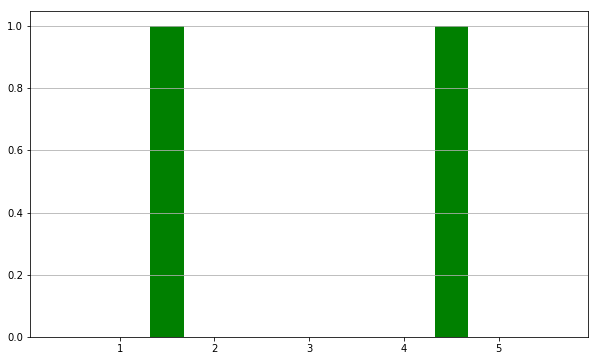

In [112]:
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.grid(True)
p1 = plt.bar(x, done, bar_width, color='g')
p2 = plt.bar(x, in_progress, bar_width, color='y', bottom=done)
p3 = plt.bar(x, to_do, bar_width, color='b', bottom=done+in_progress)